![Transformaciones](https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/main/Sesiones/Sesion2/Images/poster_sesion2.png)

#**Hands-on Sesión 2.2: Image Processing Pipeline**

## Índice de Contenidos
[**Montar el drive y cargar librerias**](#tema1)

[**Imagen RAW**](#tema2)

[**Corrección de ruido previa a la convolución**](#tema3)

[**Correción de Color**](#tema4)

[**Aumentar brillo**](#tema5)

[**Corrección Gamma**](#tema6)

[**Cambio de espacio de color a P3D65**](#tema7)

[**Demosaicking usando el metodo AHD manteniendo el espacio de color**](#tema8)

[**Visualización General**](#tema9)

## <font color='#4C5FDA'>**Montar el drive y cargar librerias**</font> <a name="tema1">


Vamos a usar una libreria especial para leer imágenes RAW


In [1]:
!pip install rawpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.7 MB/s eta 0:00:00


Importemos los paquetes necesarios para realizar el procesamiento

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import rawpy

Cargamos nuestra imagen RAW


In [3]:
image_dir = "raw_GOPRO1.dng"
!wget https://github.com/semilleroCV/Hands-on-Computer-Vision/raw/main/Sesiones/Sesion2/Imagenes/raw_GOPRO1.dng

--2024-03-18 18:38:53--  https://github.com/semilleroCV/Hands-on-Computer-Vision/raw/main/Sesiones/Sesion2/Imagenes/raw_GOPRO1.dng
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/main/Sesiones/Sesion2/Imagenes/raw_GOPRO1.dng [following]
--2024-03-18 18:38:53--  https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/main/Sesiones/Sesion2/Imagenes/raw_GOPRO1.dng
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14977972 (14M) [application/octet-stream]
Saving to: ‘raw_GOPRO1.dng’

raw_GOPRO1.dng      100%[===================>]  14.28M  39.1MB/s 

Veamos los metadatos de la imagen raw:

In [4]:
# Aplicación de línea de comandos muy potente para leer, escribir y editar
# metadatos en una amplia variedad de archivos en este caso archivos .dng
!apt install exiftool

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libimage-exiftool-perl' instead of 'exiftool'
The following additional packages will be installed:
  libarchive-zip-perl libmime-charset-perl libsombok3 libunicode-linebreak-perl
Suggested packages:
  libposix-strptime-perl libencode-hanextra-perl libpod2-base-perl
The following NEW packages will be installed:
  libarchive-zip-perl libimage-exiftool-perl libmime-charset-perl libsombok3
  libunicode-linebreak-perl
0 upgraded, 5 newly installed, 0 to remove and 38 not upgraded.
Need to get 3,964 kB of archives.
After this operation, 23.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libarchive-zip-perl all 1.68-1 [90.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libimage-exiftool-perl all 12.40+dfsg-1 [3,717 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libmime-charset-perl all 1.012.2-1

In [5]:
#Vemos los metadatos de la imagen
!exiftool raw_GOPRO1.dng

ExifTool Version Number         : 12.40
File Name                       : raw_GOPRO1.dng
Directory                       : .
File Size                       : 14 MiB
File Modification Date/Time     : 2024:03:18 18:38:55+00:00
File Access Date/Time           : 2024:03:18 18:39:07+00:00
File Inode Change Date/Time     : 2024:03:18 18:38:55+00:00
File Permissions                : -rw-r--r--
File Type                       : DNG
File Type Extension             : dng
MIME Type                       : image/x-adobe-dng
Exif Byte Order                 : Little-endian (Intel, II)
Image Description               : C:\DCIM\100GOPRO\GOPR0401.GPR
Make                            : GoPro
Camera Model Name               : HERO8 Black
Strip Offsets                   : 20674
Orientation                     : Mirror horizontal
Rows Per Strip                  : 192
Strip Byte Counts               : 147456
Software                        : Adobe DNG Converter 16.2 (Windows)
Modify Date                    


## <font color='#4C5FDA'>**Imagen RAW**</font> <a name="tema2">


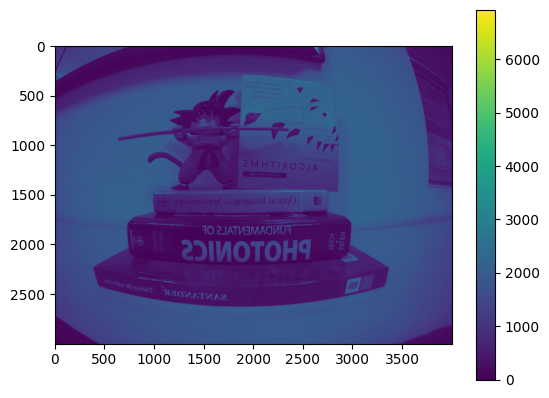

In [6]:
with rawpy.imread(image_dir) as raw:
  image0 = raw.raw_image_visible.copy()
plt.imshow(image0)
plt.colorbar()
plt.show()

[fbdd_noise_reduction = rawpy.FBDDNoiseReductionMode(1)](https://letmaik.github.io/rawpy/api/enums.html#rawpy.FBDDNoiseReductionMode)  significa que estamos usando su modo light

[demosaic_algorithm = rawpy.DemosaicAlgorithm(0)](https://letmaik.github.io/rawpy/api/enums.html#rawpy.DemosaicAlgorithm)  significa que estamos usando la interpolación lineal

[output_color = rawpy.ColorSpace(1)](https://letmaik.github.io/rawpy/api/enums.html#rawpy.ColorSpace)  significa que estamos usando el espacio de color sRGB

[no_auto_scale](https://letmaik.github.io/rawpy/api/rawpy.Params.html#rawpy.Params) se usa para deshabilitar la escala del valor de píxeles

Así como [no_auto_bright](https://letmaik.github.io/rawpy/api/rawpy.Params.html#rawpy.Params) se usa para desactivar el aumento automático de brillo

[gamma](https://letmaik.github.io/rawpy/api/rawpy.Params.html#rawpy.Params) es para dicha correción y sus parametros son potencia y pendiente (no sé qué son)

Dependiendo de la imagen será necesario jugar con el parametro user_flip (user_flip recibe valores enteros mayores a 0) del metodo postprocess

## <font color='#4C5FDA'>**Corrección de ruido previa a la convolución**</font> <a name="tema3">


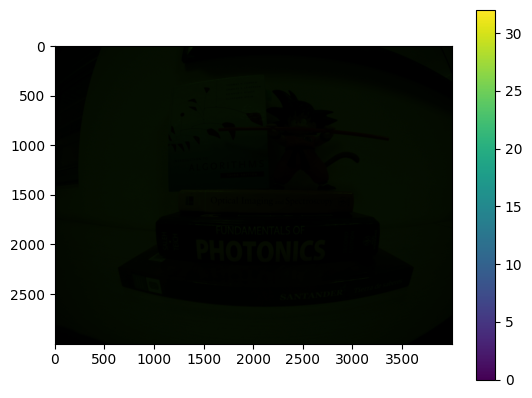

In [7]:
with rawpy.imread(image_dir) as raw:
# En este caso el proceso de interpolación de colores se hace mediante el algoritmo bilineal.
  image1 = raw.postprocess(fbdd_noise_reduction = rawpy.FBDDNoiseReductionMode(1),demosaic_algorithm = rawpy.DemosaicAlgorithm(0), output_color = rawpy.ColorSpace(1),
                           no_auto_scale = True, no_auto_bright = True, gamma = (1,1))
plt.imshow(image1)
plt.colorbar()
plt.show()

## <font color='#4C5FDA'>**Correción de Color**</font> <a name="tema4">


Cuando retiramos el parametro no_auto_scale del metodo postprocess obtenemos que se realiza la correción de color.

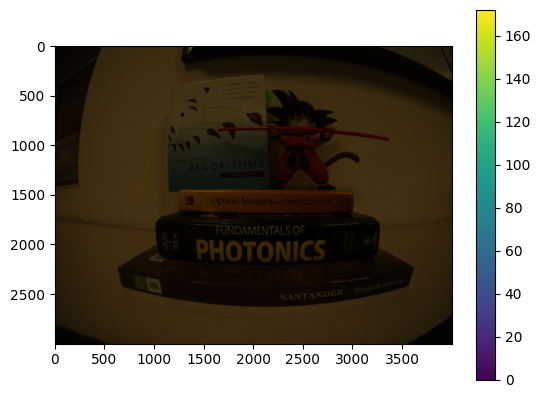

In [8]:
with rawpy.imread(image_dir) as raw:
  image2 = raw.postprocess(fbdd_noise_reduction = rawpy.FBDDNoiseReductionMode(1),demosaic_algorithm = rawpy.DemosaicAlgorithm(0), output_color = rawpy.ColorSpace(1),
                           no_auto_scale = False, no_auto_bright = True, gamma = (1,1))
plt.imshow(image2)
plt.colorbar()
plt.show()

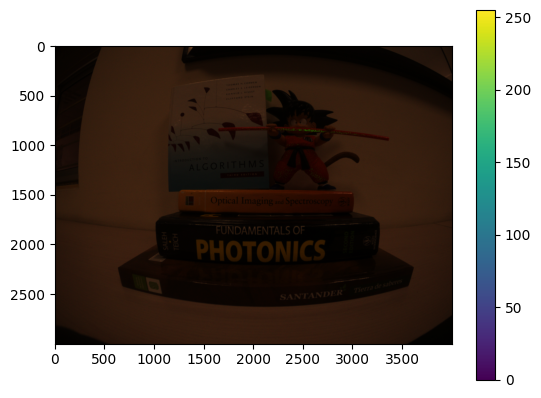

In [9]:
plt.imshow(image2 - image1)
plt.colorbar()
plt.show()


## <font color='#4C5FDA'>**Aumentar brillo**</font> <a name="tema5">


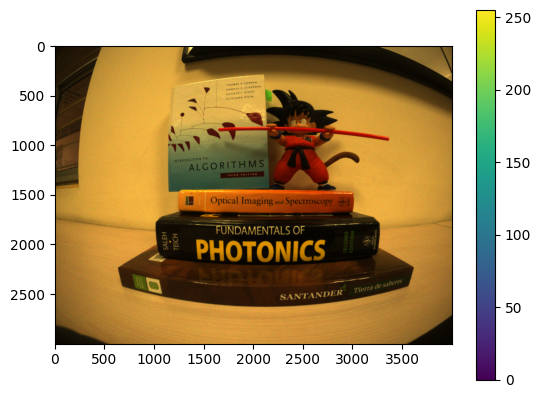

In [10]:
with rawpy.imread(image_dir) as raw:
  image3 = raw.postprocess(fbdd_noise_reduction = rawpy.FBDDNoiseReductionMode(1),demosaic_algorithm = rawpy.DemosaicAlgorithm(0), output_color = rawpy.ColorSpace(1),
                           no_auto_scale = False, no_auto_bright = False, gamma = (1,1))
plt.imshow(image3)
plt.colorbar()
plt.show()

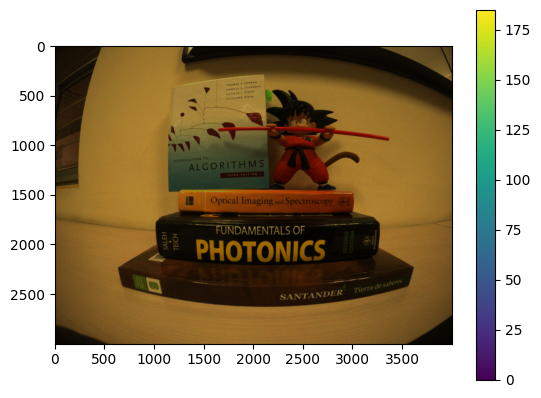

In [11]:
plt.imshow(image3 - image2)
plt.colorbar()
plt.show()




## <font color='#4C5FDA'>**Corrección Gamma**</font> <a name="tema6">


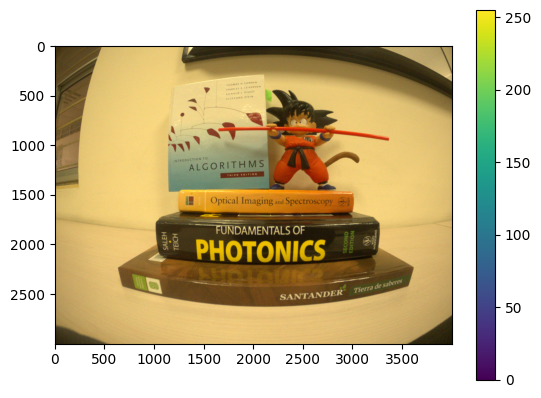

In [12]:
with rawpy.imread(image_dir) as raw:
  image4 = raw.postprocess(fbdd_noise_reduction = rawpy.FBDDNoiseReductionMode(1),demosaic_algorithm = rawpy.DemosaicAlgorithm(0), output_color = rawpy.ColorSpace(1),
                           no_auto_scale = False, no_auto_bright = False, gamma = (2.222, 4.5))
plt.imshow(image4)
plt.colorbar()
plt.show()

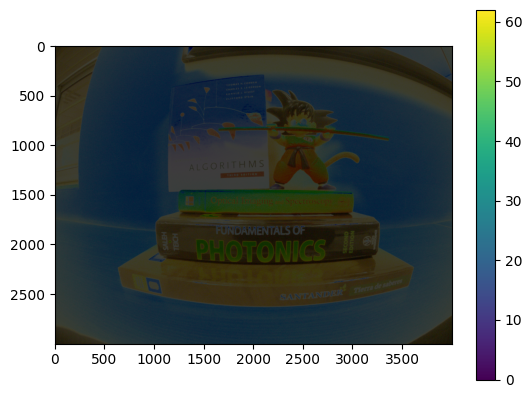

In [13]:
plt.imshow(image4 - image3)
plt.colorbar()
plt.show()


## <font color='#4C5FDA'>**Cambio de espacio de color a P3D65**</font> <a name="tema7">


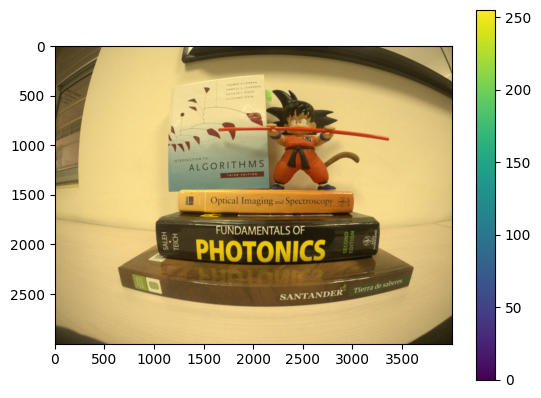

In [14]:
with rawpy.imread(image_dir) as raw:
  image5 = raw.postprocess(fbdd_noise_reduction = rawpy.FBDDNoiseReductionMode(1),demosaic_algorithm = rawpy.DemosaicAlgorithm(0), output_color = rawpy.ColorSpace(7),
                           no_auto_scale = False, no_auto_bright = False, gamma = (2.222, 4.5))
plt.imshow(image5)
plt.colorbar()
plt.show()

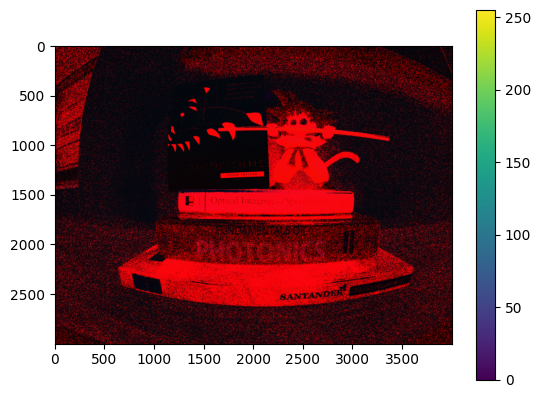

In [15]:
plt.imshow(image5 - image4)
plt.colorbar()
plt.show()



## <font color='#4C5FDA'>**Demosaicking usando el metodo AHD manteniendo el espacio de color**</font> <a name="tema8">


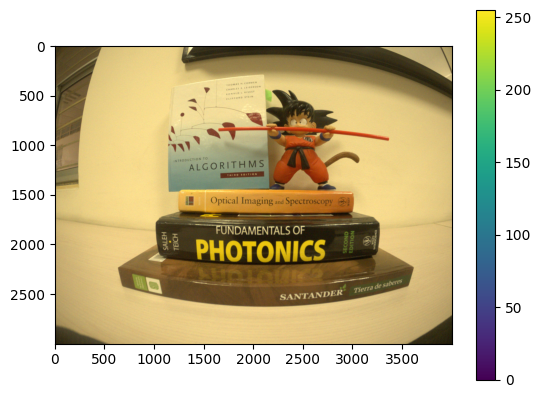

In [16]:
with rawpy.imread(image_dir) as raw:
  image6 = raw.postprocess(fbdd_noise_reduction = rawpy.FBDDNoiseReductionMode(1),demosaic_algorithm = rawpy.DemosaicAlgorithm(3), output_color = rawpy.ColorSpace(7),
                           no_auto_scale = False, no_auto_bright = False, gamma = (2.222, 4.5))
plt.imshow(image6)
plt.colorbar()
plt.show()

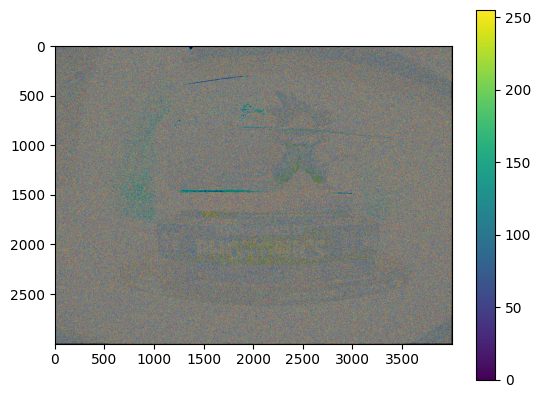

In [17]:
plt.imshow(image6 - image5)
plt.colorbar()
plt.show()

In [18]:
image0.shape

(3000, 4000)



## <font color='#4C5FDA'>**Visualización General**</font> <a name="tema9">


In [19]:
def selection (finit = 0, ffinal = image0.shape[0], cinit = 0 , cfinal = image0.shape[1]):

  plt.figure(figsize=(10,10))

  plt.subplot(3,2,1)
  plt.imshow(image1[finit:ffinal, cinit:cfinal])
  plt.colorbar()
  plt.title("Correción de ruido previa a la convolución")

  plt.subplot(3,2,2)
  plt.imshow(image2[finit:ffinal, cinit:cfinal])
  plt.colorbar()
  plt.title("Correción de Color")


  plt.subplot(3,2,3)
  plt.imshow(image3[finit:ffinal, cinit:cfinal])
  plt.colorbar()
  plt.title("Brillo Aumentado")


  plt.subplot(3,2,4)
  plt.imshow(image4[finit:ffinal, cinit:cfinal])
  plt.colorbar()
  plt.title("Corrección Gamma")


  plt.subplot(3,2,5)
  plt.imshow(image5[finit:ffinal, cinit:cfinal])
  plt.colorbar()
  plt.title("Cambio de espacio de color a P3D65")


  plt.subplot(3,2,6)
  plt.imshow(image6[finit:ffinal, cinit:cfinal])
  plt.colorbar()
  plt.title("Demosaicking usando el metodo AHD")

  plt.subplots_adjust(left=0.1,
                      bottom=0.1,
                      right=0.9,
                      top=0.9,
                      wspace=0.4,
                      hspace=0.5)
  plt.show()

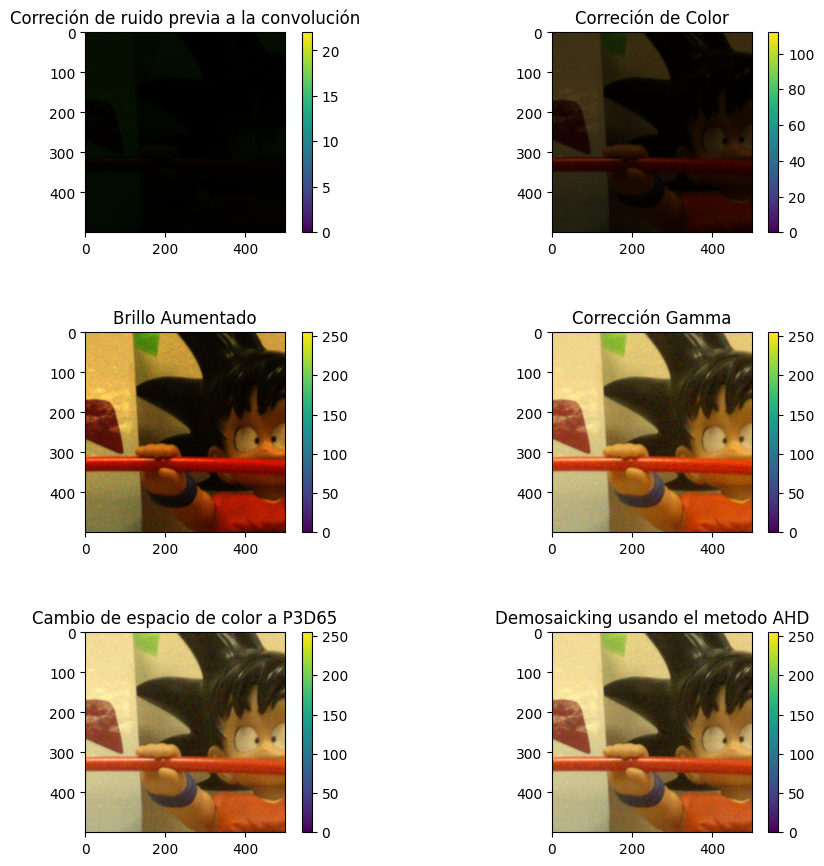

In [20]:
selection(cinit= 2000, finit = 500, ffinal = 1000, cfinal = 2500)